Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 by Daniel Köhn (2021)

# FWHM Analysis of NGC 7332 lucky imaging test 
08.09.2021, 22:54 UT - 00:17 UT

### Equipment

C 14 Edge HD + .7 reducer + ZWO ASI 1600 MM Pro @ -15°C (Gain = 450)

Mount: CGE-Pro

Filter: -

Autoguiding: Artesky 70 mm Guidscope (f=400 mm), ZWO ASI 120 MM mini, PhD2

TEMPEST cooldown time: 3h 53 min

### Imaging Workflow

- NINA: three point polar alignment, autofocus, 1st collimation check with CCD Inspector demo, locking primary mirror, 2nd collimation check with CCD Inspector demo, plate solving on NGC 7332 

- disconnect focus motor!! to avoid automatic refocusing to Firecapture settings

- Firecapture: capturing 5 x 1000 x 1 s batches of images as SER movies

- NINA: moving to home position, cover scope with dust cap

- Firecapture: taking 1000 x 1 s dark frames as SER movies

### Data Processing

**Autostakkert!3.1.4.:**

Settings

- Image Stabilization: Surface, Cropped

- Quality Estimator: Laplace, Noise Robust 4, Local (AP)

- Reference Frame: Auto

- Stack Options: FIT, 

Number of Frames to Stack: 10, 1

Frame Percentage to stack: 100, 50, 25, 5 

- Advanced Settings: Drizzle Off

**Processing for each of the 5 x 1000 frame batches**

1. Open SER file

2. Open Dark frame

3. Set image stabilization anchor on a bright star

4. Analyse

5. Set alignement points (size 88) on non-overexposed stars

6. Stack

**PixInsight**

- For each of the frame/percentage stacks register images with StarAlignment

- Check registration with Blink

- Image Integration with Pixel Rejection (Windsorized Sigma Clipping)

- FWHM analysis using the SubframSelector

Subframe scale: 0.29"/pixel according to the [astronomy.tools CCD suitibility calculator](https://astronomy.tools/calculators/ccd_suitability), not sure if this also includes the 146.05 mm backfocus distance

### Tested stacks (best frames/percentage)

- 1 frame (0.02 %)

- 5 frames (0.1 %)

- 50 frames (1 %)

- 250 frames (5 %)

- 1250 frames (25 %)

- 2500 frames (50 %)

- 5000 frames (100 %)

In [1]:
# import Python libraries
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
# Define FWHM test results

# total number of frames
ntot = 5000

# number of stacks
nstack = 7

# array with number of frames
nframes = np.zeros(nstack)
nframes = ([1,5,50,250,1250,2500,5000])

# array with percentage of frames [%]
perframes = 100 * np.divide(nframes,ntot)

# array with FWHM values [arcseconds]
FWHM = np.zeros(nstack)
FWHM = ([0.992, 1.008, 1.100, 1.160, 1.198, 1.244, 1.341])

print('perframes [%] = ', perframes)

perframes [%] =  [2.0e-02 1.0e-01 1.0e+00 5.0e+00 2.5e+01 5.0e+01 1.0e+02]


## Plot FWHM ["] vs. stack size[%]

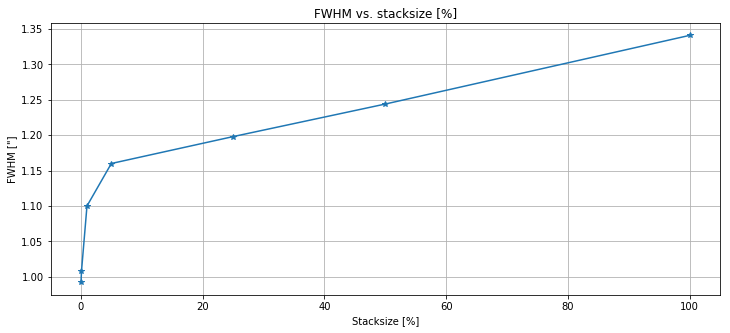

In [3]:
# Define figure size
rcParams['figure.figsize'] = 12, 5

# Plotting of gaussian
plt.plot(perframes, FWHM,'*-')
plt.title('FWHM vs. stacksize [%]')
plt.xlabel('Stacksize [%]')
plt.ylabel('FWHM ["]')
plt.grid()
plt.show()

## Plot FWHM reduction [%] vs. stack size [%]

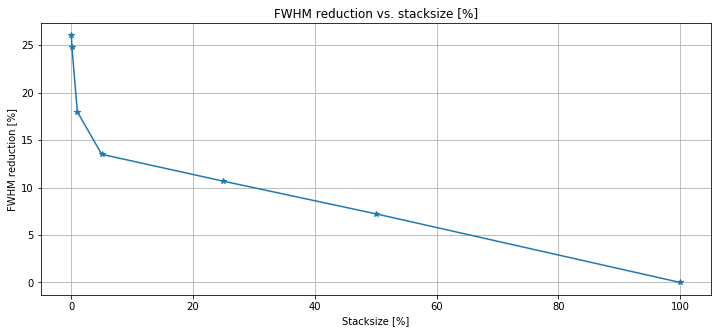

FWHM reduction [%] =  [26.02535421 24.83221477 17.97166294 13.49739001 10.66368382  7.2334079
  0.        ]


In [4]:
# FWHM reduction relative to 100% stack [%]
FWHM_red = 100. * (1 - np.divide(FWHM,FWHM[nstack-1]))

# Plotting of gaussian
plt.plot(perframes, FWHM_red,'*-')
plt.title('FWHM reduction vs. stacksize [%]')
plt.xlabel('Stacksize [%]')
plt.ylabel('FWHM reduction [%]')
plt.grid()
plt.show()

print('FWHM reduction [%] = ', FWHM_red)